# Tarea 1: Análisis Exploratorio de Datos

Se trabajará con un de archivo CSV adjunto, que contiene información sobre temperaturas superficiales terrestres y oceánicas registrado por Berkeley Earth con el fin de analizar el cambio climático a través de los años en el mundo. Las temperaturas terrestres promedio datan desde el año 1750, desde 1850 para máximo y mínimos de la misma y también del océano. 

### Importamos los paquetes necesarios

In [1]:
import numpy as np 
from string import ascii_letters
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline  
from scipy import stats

sns.set_style('whitegrid') 

# 1) Carga y descripción básica de los datos

### Abrimos el archivo con pandas

In [2]:
data = pd.read_csv('GlobalTemperatures.csv') 
data.head(3)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
type(data)
#para ver el tipo de dato que estamos trabajando

pandas.core.frame.DataFrame

In [4]:
data.info()
#Información de las columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [5]:
data.columns
#para revisar los nombres de las columnas

Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')

 * **dt** Fecha DD/MM/YY
 * **LandAverageTemperature** Temperatura promedio de la tierra en celcius
 * **LandAverageTemperatureUncertainty** Incerteza
 * **LandMaxTemperature** Temperatura máxima de la tierra celcius
 * **LandMaxTemperatureUncertainty** Incerteza
 * **LandMinTemperature** Temperatura mínima de la tierra celcius
 * **LandMinTemperatureUncertainty** Incerteza
 * **LandAndOceanAverageTemperature** Temperatura oceánica promedio celcius
 * **LandAndOceanAverageTemperatureUncertainty** Incerteza
 

# 2) Limpieza de datos

In [6]:
#revisamos los datos faltantes de cada columna
for i in data.columns:
    print('En',i, 'hay:',data[i].isnull().sum(), 'datos faltantes')

En dt hay: 0 datos faltantes
En LandAverageTemperature hay: 12 datos faltantes
En LandAverageTemperatureUncertainty hay: 12 datos faltantes
En LandMaxTemperature hay: 1200 datos faltantes
En LandMaxTemperatureUncertainty hay: 1200 datos faltantes
En LandMinTemperature hay: 1200 datos faltantes
En LandMinTemperatureUncertainty hay: 1200 datos faltantes
En LandAndOceanAverageTemperature hay: 1200 datos faltantes
En LandAndOceanAverageTemperatureUncertainty hay: 1200 datos faltantes


In [7]:
# y los datos válidos de cada columna
for i in data.columns:
    print('En',i, 'hay:',data[i].notna().sum(), 'datos válidos')

En dt hay: 3192 datos válidos
En LandAverageTemperature hay: 3180 datos válidos
En LandAverageTemperatureUncertainty hay: 3180 datos válidos
En LandMaxTemperature hay: 1992 datos válidos
En LandMaxTemperatureUncertainty hay: 1992 datos válidos
En LandMinTemperature hay: 1992 datos válidos
En LandMinTemperatureUncertainty hay: 1992 datos válidos
En LandAndOceanAverageTemperature hay: 1992 datos válidos
En LandAndOceanAverageTemperatureUncertainty hay: 1992 datos válidos


Con esta información, más adelante podremos determinar qué hacer con los datos faltantes, es decir ver si representan un alto porcentaje del total de datos o no.

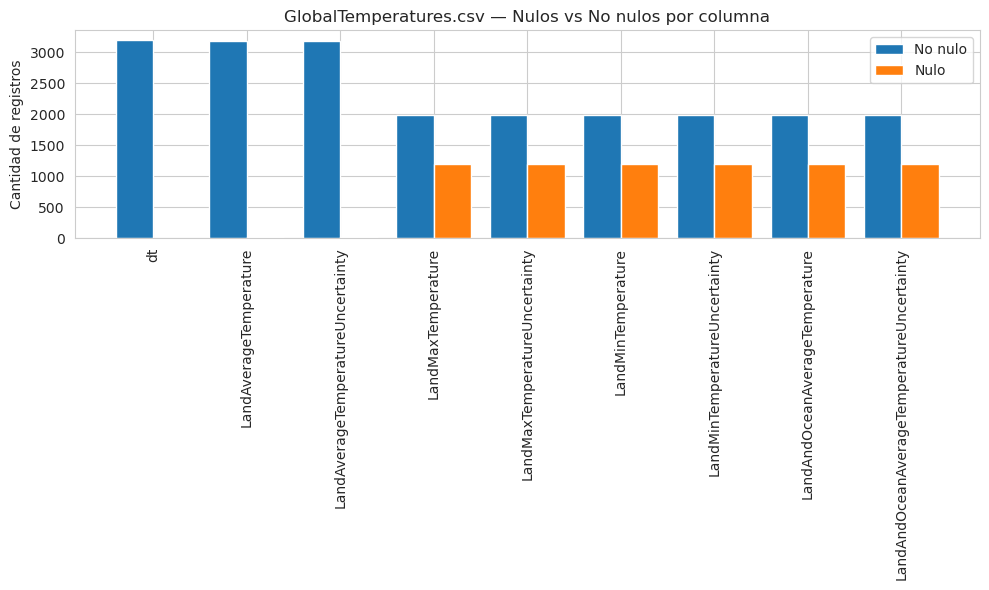

In [11]:
#Visualizar
def plot_null_nonnull_for_csv(csv_path):
      # Importar dentro de la función
    df = pd.read_csv(csv_path, low_memory=False)
    
    null_counts = df.isnull().sum()
    nonnull_counts = df.notnull().sum()
    
    x = np.arange(len(df.columns))
    width = 0.4
    
    fig, ax = plt.subplots(figsize=(max(10, len(df.columns) * 0.6), 6))
    ax.bar(x - width/2, nonnull_counts, width, label="No nulo")
    ax.bar(x + width/2, null_counts, width, label="Nulo")
    ax.set_xticks(x)
    ax.set_xticklabels(df.columns, rotation=90)
    ax.set_ylabel("Cantidad de registros")
    ax.set_title(f"{csv_path} — Nulos vs No nulos por columna")
    ax.legend()
    plt.tight_layout()
    plt.show()

# Uso: 
plot_null_nonnull_for_csv('GlobalTemperatures.csv')

El dataset tiene 3192 recuentos con 9 características. Los datos nulos totales son 7224, siendo 1200 para todas las columnas distintas a LandAverageTemperature y LandAverageTemperatureUncertainty, lo cual tiene sentido, pues la toma de datos para las otras columnas comenzó alrededor de una década más tarde.  

Identificamos valores duplicados mediante:

In [12]:
data.duplicated().sum()

np.int64(0)

### Datos faltantes: Los valores NaN los reemplazamos por el promedio de la columna en la que se encuentren (excepto la columna dt: fecha)

Si queremos rellenar valores NaN de una columna, podemos hacerlo con <code>fillna()</code>, que rellenará los elementos NaN con el valor indicado

In [13]:
df_full = data.copy()
for col in df_full.columns:
    if col != "dt":
        df_full[col] = df_full[col].fillna(df_full[col].mean())

In [14]:
data.head(3)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#Aquí vemos que efectivamente se rellenaron los datos NaN
df_full.head(3)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
1,1750-02-01,3.083,3.702,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
2,1750-03-01,5.626,3.076,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532


In [16]:
for i in df_full.columns:
    print('En',i, 'hay:',df_full[i].notna().sum(), 'datos válidos')

En dt hay: 3192 datos válidos
En LandAverageTemperature hay: 3192 datos válidos
En LandAverageTemperatureUncertainty hay: 3192 datos válidos
En LandMaxTemperature hay: 3192 datos válidos
En LandMaxTemperatureUncertainty hay: 3192 datos válidos
En LandMinTemperature hay: 3192 datos válidos
En LandMinTemperatureUncertainty hay: 3192 datos válidos
En LandAndOceanAverageTemperature hay: 3192 datos válidos
En LandAndOceanAverageTemperatureUncertainty hay: 3192 datos válidos


De esta manera, df_full contiene nuestros datos habiendo rellenado los NaN de acuerdo al promedio de cada columna

###  Comentar sobre posibles outliers y cómo podrían influir en el análisis.

Para analizar la presencia de outliers, es decir, valores que están muy alejados de la media, podemos comparar los valores de mean y std. Vemos que, para la columna LandAndOceanAverageTemperature estos valores discrepan bastante (15.212 vs 1.274), lo que indica la posible presencia de outliers. Para verificar esto usaremos la técnica de Zscore, la cual nos indica cuántas desviaciones estándar está un valor por encima o por debajo de la media. 

In [18]:
z = np.abs(stats.zscore(data['LandAndOceanAverageTemperature'])) 

#consideramos como outliers los valores que se alejen más de 3 desviaciones estándar de la media
print((z >= 3).sum(), "outliers detectados")

0 outliers detectados


Ojo piojo, la columna LandAndOceanAverageTemperature mezcla la temperatura del oceano y la temperatura promedio, por lo que los resultados de analizarlas por separado puede llevarnos a conclusiones distintas sobre el comportamiento de la temperatura para la tierra y el oceano.

# 3) Análisis estadístico

### Revisión de las estadísticas como promedio, desviación estándar, mediana

In [22]:
#Calculamos características como media, mediana, desviación, etc.
df_full.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.373064,1.094376,3.404137,0.460672,3.282695,0.352167,1.006406,0.058126
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.327750,0.187000,12.266000,0.206750,0.959500,0.231000,14.765500,0.108000
50%,8.584500,0.394500,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
75%,12.538750,1.413250,16.749000,0.479782,4.669000,0.431849,15.819500,0.131000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


In [35]:
df_full.drop('dt', axis=1).median()

LandAverageTemperature                        8.584500
LandAverageTemperatureUncertainty             0.394500
LandMaxTemperature                           14.350601
LandMaxTemperatureUncertainty                 0.479782
LandMinTemperature                            2.743595
LandMinTemperatureUncertainty                 0.431849
LandAndOceanAverageTemperature               15.212566
LandAndOceanAverageTemperatureUncertainty     0.128532
dtype: float64

La mediana es casi igual al promedio en todas las columnas menos en LandAverageTemperatureUncertainty.

In [36]:
df_full.drop('dt', axis=1).std()

LandAverageTemperature                       4.373064
LandAverageTemperatureUncertainty            1.094376
LandMaxTemperature                           3.404137
LandMaxTemperatureUncertainty                0.460672
LandMinTemperature                           3.282695
LandMinTemperatureUncertainty                0.352167
LandAndOceanAverageTemperature               1.006406
LandAndOceanAverageTemperatureUncertainty    0.058126
dtype: float64

La temperatura cambia respecto a las estaciones, y las estaciones tienen que ver con los meses y así mismo pueden tener diferencias a través de los años, por lo que definimos:

In [23]:
#Columna año
data['Year']=pd.to_datetime(data['dt']).dt.year

In [24]:
#Columna mes
data['Monfh']=pd.to_datetime(data['dt']).dt.month

In [25]:
#Usando nuestros queridisimos diccionarios, columna estación
def git_gud(num_mes):
    estaciones={1:"Winter",2:"Winter",3:"Spring",4:"Spring",5:"Spring",6:"Summer",7:"Summer",8:"Summer",9:"Autum",10:"Autum",11:"Autum",12:"Winter"}
    return estaciones.get(num_mes)
data['Season']=data['Monfh'].apply(git_gud)

In [26]:
#Columna mes con nombre
def dale_nombre_dj(DJ):
    monfhs= {1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"}
    #Top 10 cosas q no podría hacer si estuviese trabajando con los días de semana
    return  monfhs.get(DJ)
data["Monfh_nom"]=data["Monfh"].apply(dale_nombre_dj)
    

In [27]:
#Restamos LandAvg a LandAndOceanAvg para tener una nueva columna OceanAvg
data["OceanAverageTemperature"]= data["LandAndOceanAverageTemperature"]-data["LandAverageTemperature"]

# 4) Visualización de datos

#### Crear gráficos para visualizar distribuciones, relaciones entre variables y patrones interesantes (histogramas, boxplots, scatter plots, etc.).
#### Crear un heatmap para mostrar la correlación entre las variables numéricas.

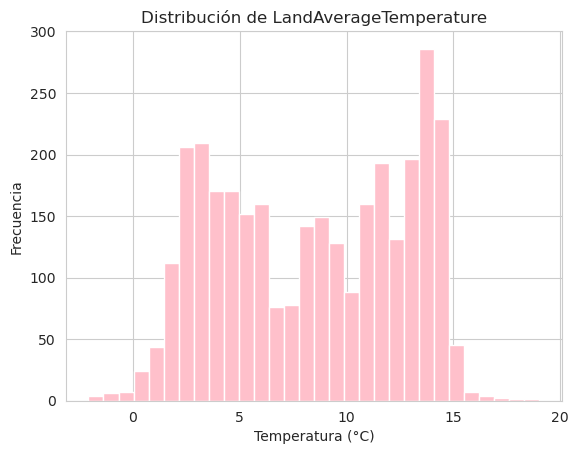

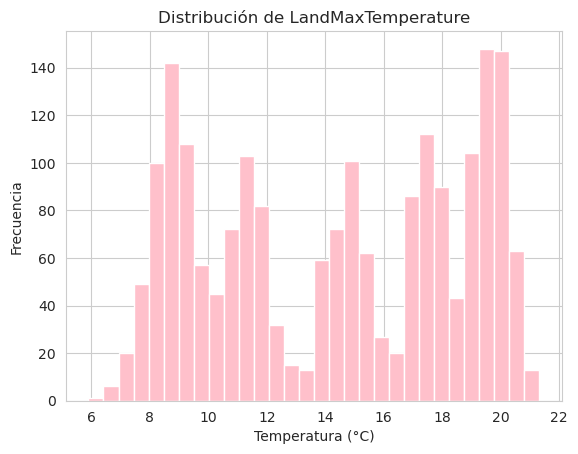

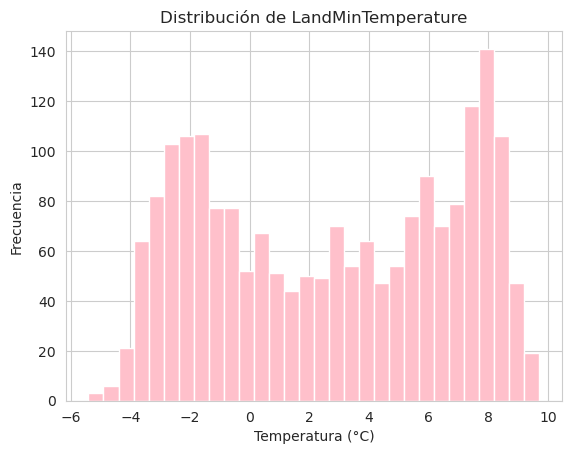

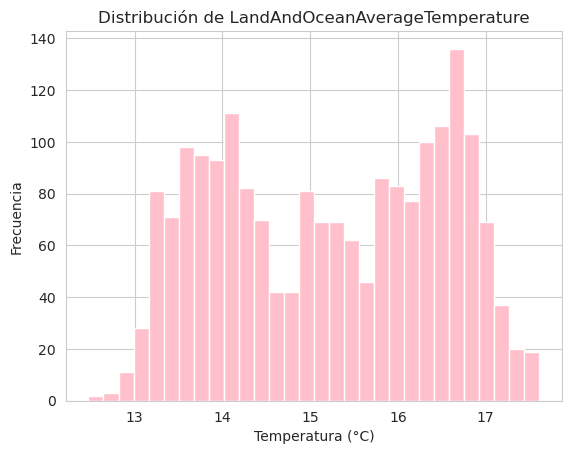

In [30]:
variables = [
    'LandAverageTemperature',
    'LandMaxTemperature',
    'LandMinTemperature',
    'LandAndOceanAverageTemperature'
]

for var in variables:
    plt.figure()
    plt.hist(data[var], color = 'pink', bins = 30)
    plt.title(f"Distribución de {var}")
    plt.xlabel("Temperatura (°C)")
    plt.ylabel("Frecuencia")
    plt.show()


### Con respecto a la distribución de las columnas más importantes se tiene:
 * **LandAverageTemperature:** Vemos que existen 2 peaks, alrededor de 3°C y 14°C. Posibles outliers serían los valores extremos menores a 0°C y mayores a 15°C.
 * **LandMaxTemperature:** Este parámetro es variable a lo largo de los años, por lo que se presentan varios peaks. 
 * **LandMinTemperature:** Este parámetro es variable a lo largo de los años, sin embargo tiene una distribución diferente a la temperatura máxima. En este caso, el valor que más se repite es de app. 8°C, y el segundo que más se repite es de -2°C.
 * **LandAndOceanAverageTemperature:** Presenta una distribución de doble peak, cercano a 17°C y a 14°C

In [38]:
Data_skedadle = data.copy()
#Formato insano
Data_skedadle['dt'] = pd.to_datetime(Data_skedadle['dt'])

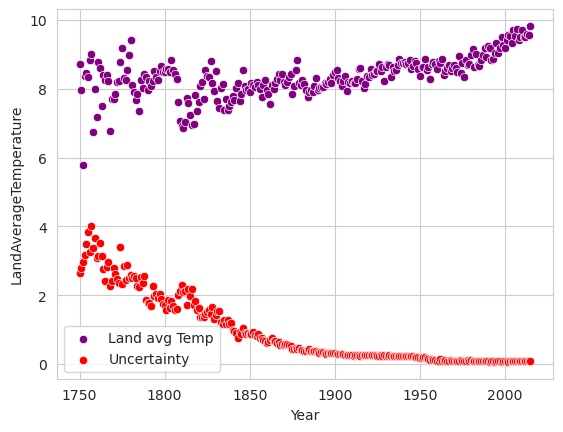

In [39]:
#Este es el eskitush
#Agrupamos las columnas a plotear por año calculando el promedio
plot_skedadle = Data_skedadle.groupby('Year')[['LandAverageTemperature','LandAverageTemperatureUncertainty']].mean().reset_index()
#Ploteamos con seaborn las columnas deseadas en función de la deseada
sns.scatterplot(data=plot_skedadle, x='Year', y='LandAverageTemperature',color="Purple", label='Land avg Temp')
sns.scatterplot(data=plot_skedadle, x='Year', y='LandAverageTemperatureUncertainty',color="red", label='Uncertainty')

plt.xlabel('Year')
plt.show()

Respecto a LandAverageTemperature en función de los años, tenemos que presenta una leve pendiente positiva a medida que pasan los años, lo que indica que la temperatura global de la Tierra aumenta.
Por otro lado la incertidumbre en las mediciones disminuye a medida que pasa el tiempo, lo cual se puede atribuir a la mejor de los instrumentos de medición, etc, lo que se ve reflejado en valores menos dispersos de temperatura promedio general.

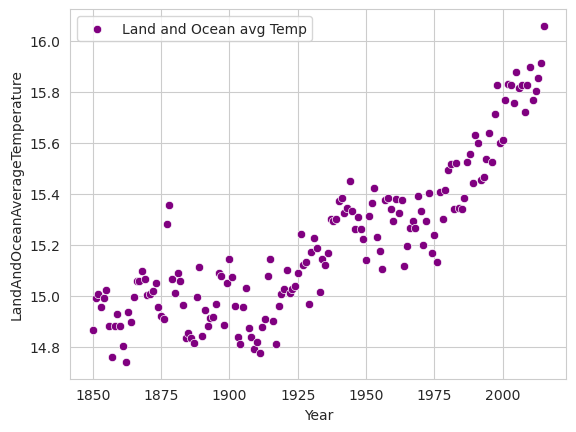

In [40]:
#Repetimos el skitush
plot_skedadle = Data_skedadle.groupby('Year')['LandAndOceanAverageTemperature'].mean().reset_index()
sns.scatterplot(data=plot_skedadle, x='Year', y='LandAndOceanAverageTemperature',color="Purple",label='Land and Ocean avg Temp')
plt.xlabel('Year')
plt.show()

De la misma forma que la temperatura general de la tierra, las mediciones de tierra y oceano muestran incremento leve al pasar los años.

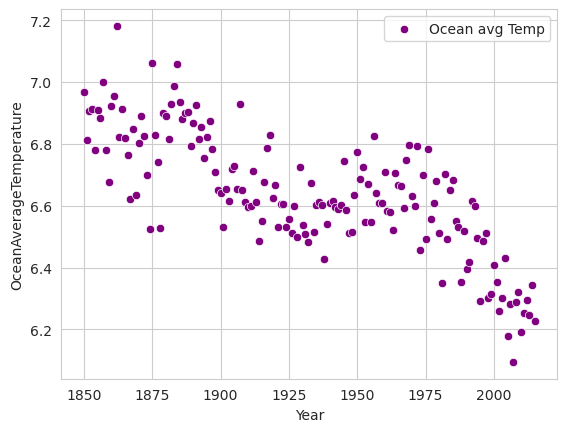

In [41]:
#Repetimos eskitush
plot_skedadle = Data_skedadle.groupby('Year')['OceanAverageTemperature'].mean().reset_index()
sns.scatterplot(data=plot_skedadle, x='Year', y='OceanAverageTemperature', color="purple", label='Ocean avg Temp')
plt.xlabel('Year')
plt.show()

Efectivamente, al analizar por separado la temperatura del oceano y la tierra, notamos que hay una tendencia inversa, o sea que si bien la temperatura de la tierra va en aumento, la tierra del oceano va en declive.

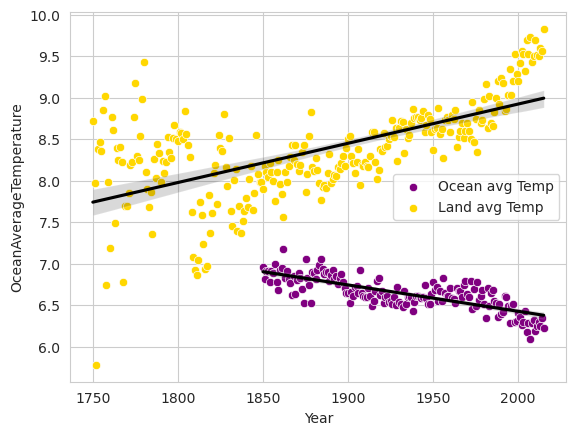

In [42]:
#Más eskitush
plot_skedadle = Data_skedadle.groupby('Year')[['LandAverageTemperature','OceanAverageTemperature']].mean().reset_index()
sns.scatterplot(data=plot_skedadle, x='Year', y='OceanAverageTemperature', color="purple",label='Ocean avg Temp')
sns.scatterplot(data=plot_skedadle, x='Year', y='LandAverageTemperature',color="gold",label='Land avg Temp')
#Regplot para asignar un modelo de regresión líneal a la columna que vamos a plotar en función de ###
sns.regplot(data=plot_skedadle, x='Year', y='LandAverageTemperature', scatter=False, color='black')
sns.regplot(data=plot_skedadle, x='Year', y='OceanAverageTemperature', scatter=False, color='black')
plt.xlabel('Year')
plt.show()

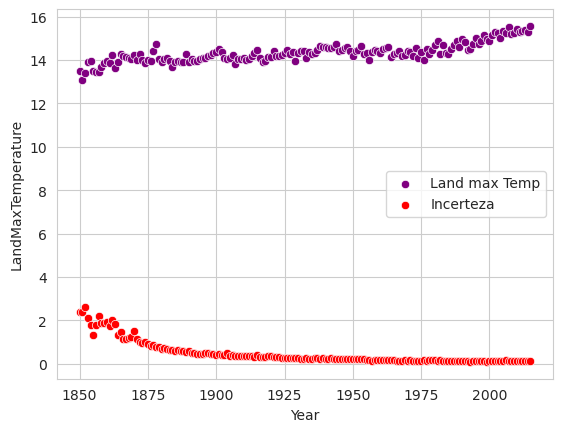

In [43]:
#skitush
plot_skedadle = Data_skedadle.groupby('Year')[['LandMaxTemperature','LandMaxTemperatureUncertainty']].mean().reset_index()
sns.scatterplot(data=plot_skedadle, x='Year', y='LandMaxTemperature', label = 'Land max Temp', color="purple")
sns.scatterplot(data=plot_skedadle, x='Year', y='LandMaxTemperatureUncertainty', color='red', linestyle='-', label = 'Incerteza')
plt.xlabel('Year')
plt.show()

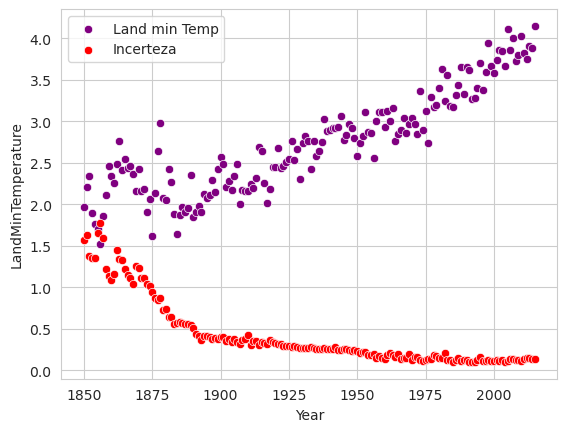

In [44]:
#Skitush
plot_skedadle = Data_skedadle.groupby('Year')[['LandMinTemperature','LandMinTemperatureUncertainty']].mean().reset_index()
sns.scatterplot(data=plot_skedadle, x='Year', y='LandMinTemperature', color="Purple", label='Land min Temp')
sns.scatterplot(data=plot_skedadle, x='Year', y='LandMinTemperatureUncertainty', color='red', label='Incerteza')
plt.xlabel('Year')
plt.show()

La tendencia de la temperatura y máxima y mínima concuerdan con el aumento de la temperatura promedio, pues ambas igual suben al pasar de los años. De la misma forma, la incerteza disminuye.

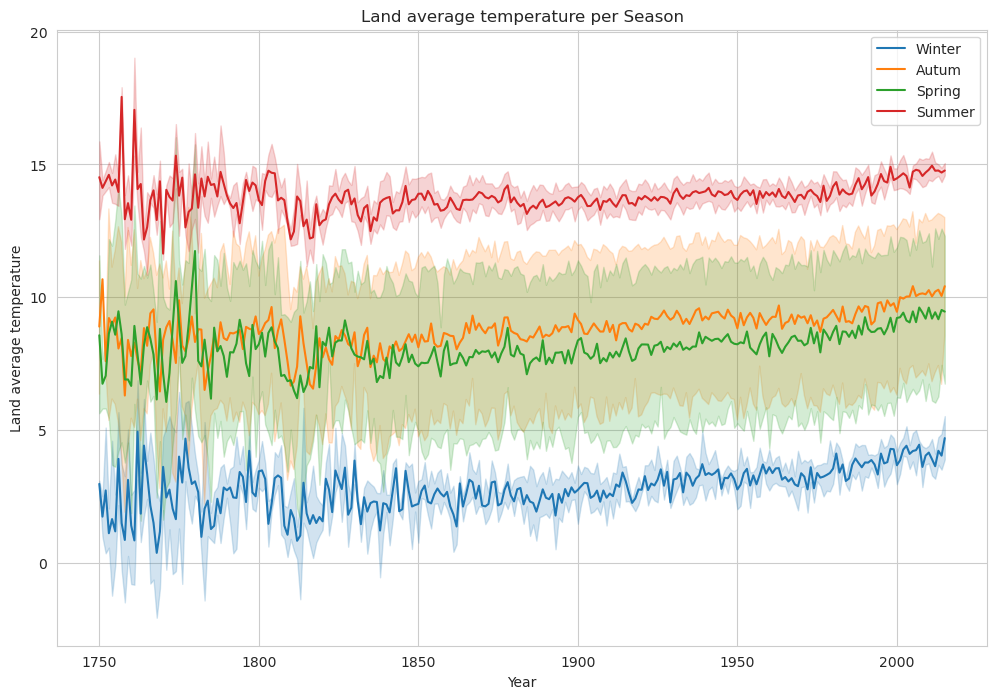

In [45]:
#Este está insano
plt.figure(figsize=(12,8))
#Lineplot, y en la data seleccionamos que el dato de la columna sea la estación que queremos plotear, y luego colocamos las variables.
sns.lineplot(data=Data_skedadle[Data_skedadle['Season']=="Winter"], x="Year", y="LandAverageTemperature",markers=True, label="Winter")
sns.lineplot(data=Data_skedadle[Data_skedadle['Season']=="Autum"], x="Year", y="LandAverageTemperature",markers=True, label="Autum")
sns.lineplot(data=Data_skedadle[Data_skedadle['Season']=="Spring"], x="Year", y="LandAverageTemperature",markers=True, label="Spring")
sns.lineplot(data=Data_skedadle[Data_skedadle['Season']=="Summer"], x="Year", y="LandAverageTemperature",markers=True, label="Summer")
plt.xlabel('Year')
plt.ylabel('Land average temperature')
plt.title('Land average temperature per Season')
plt.legend()
plt.show()

Este lineplot permite observar claramente la disminución de la incerteza al pasar de los años, al tener líneas menos distantes entre sí, mientras que la temperatura promedio por temporada también muestra un aumento, con una subida más o menos pareja para cada estación.

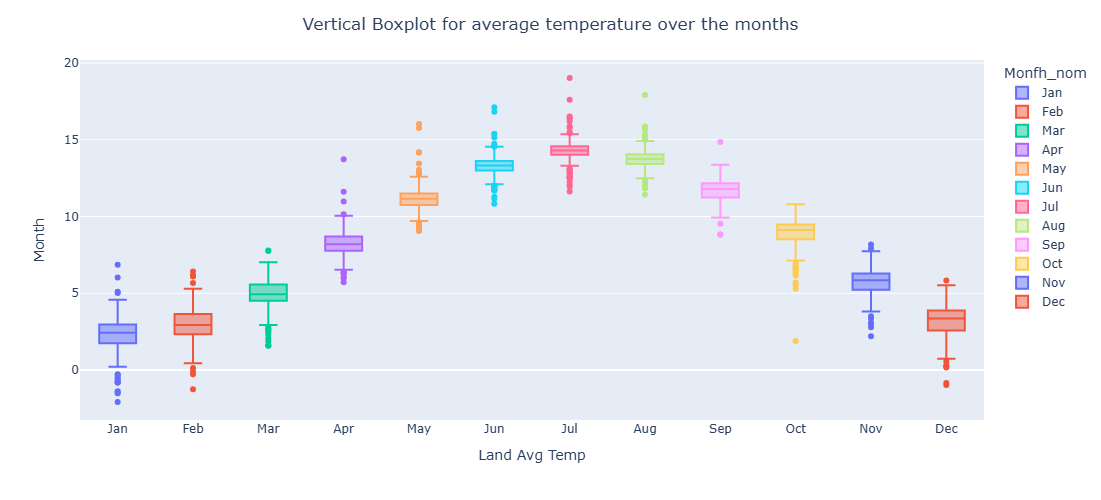

In [31]:
#Plotear por mes con box plot de plotly
fig = px.box(Data_skedadle, y='LandAverageTemperature', x='Monfh_nom', color='Monfh_nom',orientation="v")
#Modificar el layout
fig.update_layout(title='Vertical Boxplot for average temperature over the months',height=500,width=800, xaxis_title="Land Avg Temp", yaxis_title="Month",title_x=0.5)
fig.show()

Notamos que los meses más calurosos en promedio son entre Junio y Agosto, que corresponden al verano en el hemisferio norte, mientras que entre diciembre y febrero, tenemos los meses más helados.

# 5) Análisis de correlación

In [48]:
df_full['dt'] = pd.to_datetime(df_full['dt'])

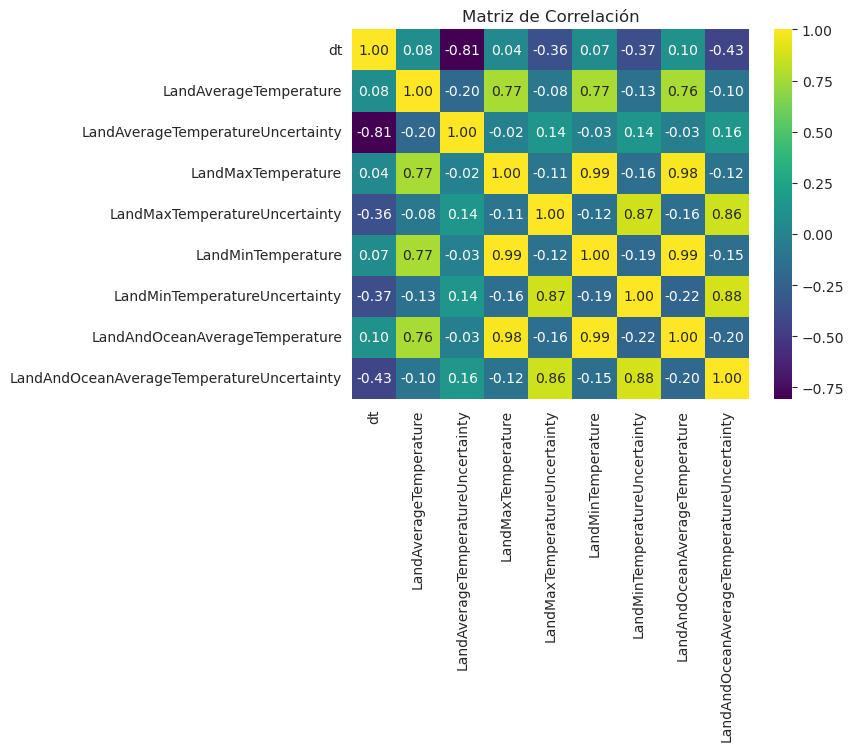

In [49]:
correlation_matrix = df_full.corr()

plt.figure()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")  
# Con annot=True se muestran los valores numéricos dentro de cada celda.
# fmt=".2f" para tener sólo 2 decimales (Ayuda de ChatGpt para que se vea más bonito)
plt.title("Matriz de Correlación")
plt.show()

### Interpretación de la matriz de correlación

Sabemos que cuando los valores, mientras más cercanos a 1, tienen una mayor correlación lineal entre las variables. Vemos que la temperatura mínima y máxima de la Tierra tienen directa relación. También sucede que existe una relación entre la temperatura mínima/máxima de la Tierra y la temperatura promedio de Land & Ocean.

Esto para futuros modelos de machine learning podría tener implicaciones como tener que reducir las columnas que tienen información muy similar, para poder simplificar los modelos. En el caso de las columnas de incertidumbre, podrían combinarse para tener una única, ya que todas tienden a disminuir con el paso de los años.

## 6) Conclusiones

###  Resumir los hallazgos principales del análisis. Proponer hipótesis que podrían ser investigadas con modelos de machine learning en el futuro.


La tendencia de los datos es clara, la temperatura promedio global va en aumento al igual que las máximas y mínimas. Los inviernos y veranos serán más calurosos, y el oceano muestra una conducta no intuitiva al ir bajando a través de los años. La incerteza bajó considerablemente, lo que puede ser producto de la mejora en los instrumentos de medición y las condiciones a las que se realizan las medidas.

Los datos pueden ser analizados con machine-learning para realizar predicciones sobre el avance del cambio climático y el alza de las temperaturas globales, así como también intentar predecir la subida esperada de la temperatura de un año y constatar con datos reales si estamos cumpliendo con la agenda del cambio climático. 